<a href="https://colab.research.google.com/github/jaeyoonjeong9024/4weeks/blob/main/breastcancer_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 셀 1: 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 셀 2: 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/breast_cancer.csv')
print("데이터 shape:", df.shape)
print("\n데이터 기본 정보:")
print(df.info())

데이터 shape: (569, 32)

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float6

In [6]:
# 셀 3: 데이터 확인 및 시각화
print("데이터 샘플:")
print(df.head(10))
print("\n기술 통계:")
print(df.describe())

데이터 샘플:
   Unnamed: 0  mean radius  mean texture  mean perimeter  mean area  \
0           0        17.99         10.38          122.80     1001.0   
1           1        20.57         17.77          132.90     1326.0   
2           2        19.69         21.25          130.00     1203.0   
3           3        11.42         20.38           77.58      386.1   
4           4        20.29         14.34          135.10     1297.0   
5           5        12.45         15.70           82.57      477.1   
6           6        18.25         19.98          119.60     1040.0   
7           7        13.71         20.83           90.20      577.9   
8           8        13.00         21.82           87.50      519.8   
9           9        12.46         24.04           83.97      475.9   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690    

레이블 분포:
label
0    212
1    357
Name: count, dtype: int64


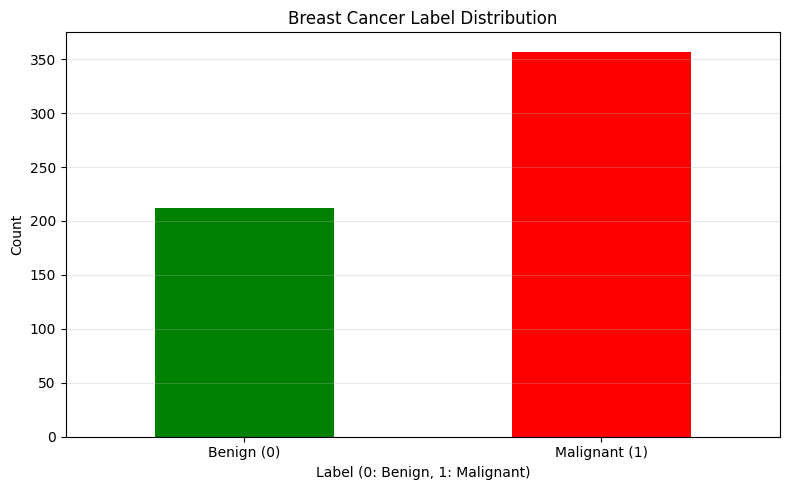

In [7]:
# 셀 4: 레이블 분포 시각화
print("레이블 분포:")
print(df['label'].value_counts().sort_index())

plt.figure(figsize=(8, 5))
df['label'].value_counts().sort_index().plot(kind='bar', color=['green', 'red'])
plt.title('Breast Cancer Label Distribution')
plt.xlabel('Label (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
# 셀 5: 데이터 전처리
# 첫 번째 열(인덱스 컬럼) 제거
X = df.drop(['label'], axis=1)
if '' in X.columns or 'Unnamed: 0' in X.columns:
    X = X.drop([col for col in X.columns if col == '' or 'Unnamed' in col], axis=1)

y = df['label']

print("특성 개수:", X.shape[1])
print("샘플 개수:", X.shape[0])
print("\n레이블 분포:")
print(y.value_counts())

특성 개수: 30
샘플 개수: 569

레이블 분포:
label
1    357
0    212
Name: count, dtype: int64


In [9]:
# 셀 6: 스케일링 및 One-hot Encoding
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = pd.get_dummies(y).values

print("X shape:", X.shape)
print("Y shape:", Y.shape)
print("\nOne-hot encoding 예시:")
print("Original labels:", y[:5].values)
print("Encoded labels:\n", Y[:5])

X shape: (569, 30)
Y shape: (569, 2)

One-hot encoding 예시:
Original labels: [0 0 0 0 0]
Encoded labels:
 [[ True False]
 [ True False]
 [ True False]
 [ True False]
 [ True False]]


In [10]:
# 셀 7: 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("훈련 데이터:", X_train.shape, "| 테스트 데이터:", X_test.shape)
print("훈련 레이블:", y_train.shape, "| 테스트 레이블:", y_test.shape)

훈련 데이터: (455, 30) | 테스트 데이터: (114, 30)
훈련 레이블: (455, 2) | 테스트 레이블: (114, 2)


In [11]:
# 셀 8: 딥러닝 모델 구축
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(Y.shape[1], activation="softmax")
])
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,130 (16.13 KB)

 Trainable params: 4,130 (16.13 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 셀 9: 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5710 - loss: 0.6412 - val_accuracy: 0.9451 - val_loss: 0.3409
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9182 - loss: 0.3401 - val_accuracy: 0.9670 - val_loss: 0.1929
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9390 - loss: 0.2023 - val_accuracy: 0.9670 - val_loss: 0.1398
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9330 - loss: 0.1801 - val_accuracy: 0.9780 - val_loss: 0.1132
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9670 - loss: 0.1067 - val_accuracy: 0.9780 - val_loss: 0.0940
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9591 - loss: 0.1207 - val_accuracy: 0.9780 - val_loss: 0.0852
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9613 - loss: 0.1014 - val_accuracy: 0.9670 - val_loss: 0.0806
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9699 - loss: 0.0962 - val_accuracy: 0.9670 - val_los

In [13]:
# 셀 10: 예측 및 클래스 변환
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

print("예측 완료")
print("실제 클래스 분포:", np.bincount(y_test_class))
print("예측 클래스 분포:", np.bincount(y_pred_class))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
예측 완료
실제 클래스 분포: [47 67]
예측 클래스 분포: [48 66]


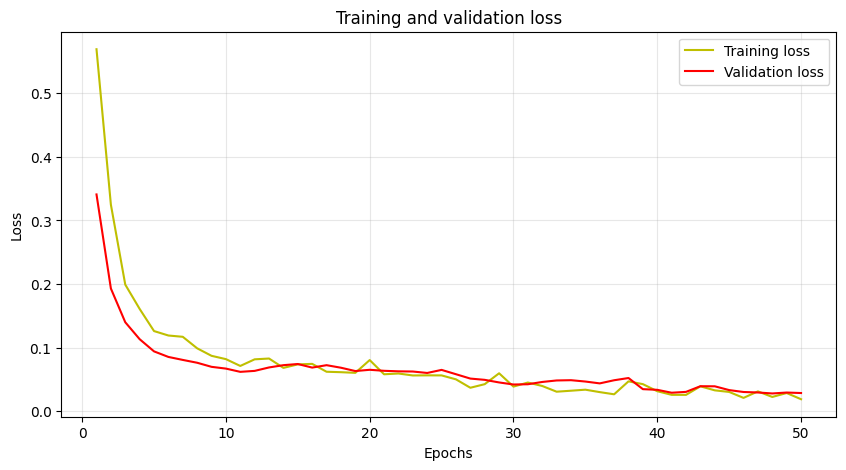

In [14]:
# 셀 11: 학습 곡선 - Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

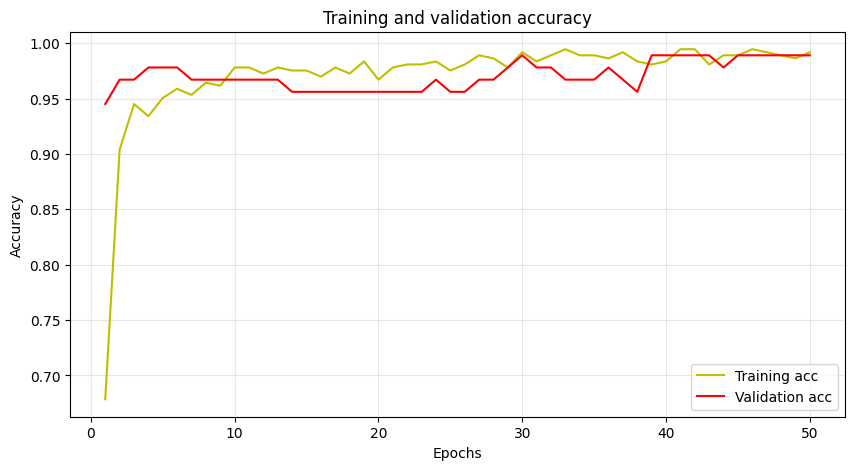

In [15]:
# 셀 12: 학습 곡선 - Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [16]:
# 셀 13: 성능 평가
print("=== Classification Report ===")
print(classification_report(y_test_class, y_pred_class, target_names=['Benign', 'Malignant']))
print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test_class, y_pred_class))

=== Classification Report ===
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97        47
   Malignant       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


=== Confusion Matrix ===
[[46  1]
 [ 2 65]]


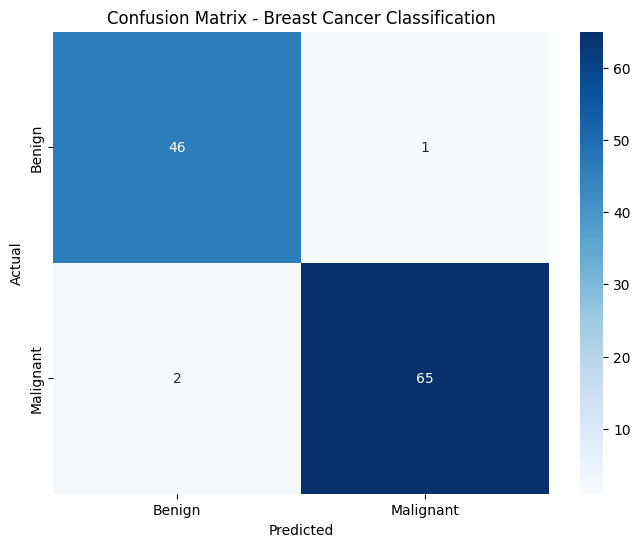


Test Accuracy: 0.9737 (97.37%)


In [17]:
# 셀 14: 혼동 행렬 시각화
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Breast Cancer Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 정확도 출력
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\nTest Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")